In [1958]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Задание 1

Используя модуль datasets библиотеки Scikit-learn, сгенерировать модельный
набор данных для задачи линейной регрессии с одной **целевой переменной и двумя признаками**,
из которых **информативным является один**. Параметр, определяющий **степень рассеянности данных, установить равным 5.0**,
**количество объектов положить равным 200.**
Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.

In [1959]:
# coef - коэффициенты базовой линейной модели
X, y, coef = make_regression(n_samples=200, n_features=2, noise=5.0, coef=True, n_informative=1, random_state=128)
coef

array([ 0.        , 35.81900115])

Вывести на одном графике сгенерированный набор данных в координатах информативный признак – целевая переменная
(использовать pylab.scatter) и прямую со сгенерированными коэффициентами.

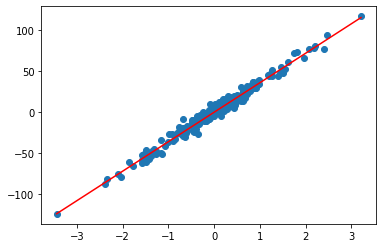

In [1960]:
x_column = X[:, 1]
coef_x = np.linspace(np.min(x_column), np.max(x_column), 200)
coef_y = coef_x * np.max(coef)

plt.scatter(x_column, y)
plt.plot(coef_x, coef_y, color='r')
plt.show()

Поэкспериментировать с величиной шума: задать значения соответствующего параметра равными 7.0, 10.0 и 15.0,
вывести графики (вместе с прямой регрессии) в одном ряду, с заголовками, сообщающими об используемом значении параметра
шума.

Noise: 7.0


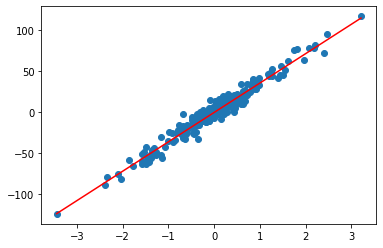

Noise: 10.0


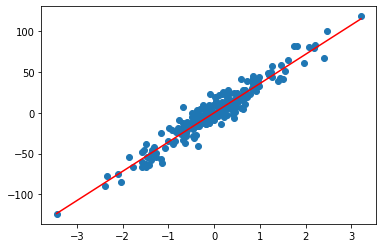

Noise: 15.0


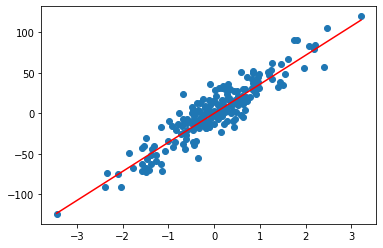

In [1961]:
noises = [7.0, 10.0, 15.0]
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,20))
# ax_lst = [ax[0][0], ax[0][1]]
for noise in noises:
    X, y, coef = make_regression(n_samples=200, n_features=2, noise=noise, coef=True, n_informative=1, random_state=128)
    x_column = X[:, 1]
    coef_x = np.linspace(np.min(x_column), np.max(x_column), 200)
    coef_y = coef_x * np.max(coef)

    print(f'Noise: {noise}')
    plt.scatter(x_column, y)
    plt.plot(coef_x, coef_y, color='r')
    plt.show()

Выполнить разовое разбиение всех полученных наборов данных (с различными значениями шума) на обучающую и
тестовую выборки в соотношении 70/30.

In [1962]:
class DataSequence:
    def __init__(self, noise, test_size):
        self.noise = noise
        X, y, coef = make_regression(n_samples=200, noise=noise, n_features=2, coef=True,  n_informative=1, random_state=128)
        self.coef = coef
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(X, y, test_size=test_size, random_state=125)

result_data = []
for noise in noises:
    result_data.append(DataSequence(noise=noise, test_size=0.3))

1) Для каждого набора данных создать модель линейной регрессии и обучить ее на обучающей выборке, используя метод
градиентного спуска.

2) Получить предсказания обученных моделей для объектов тестовых выборок. Вывести массивы ответов на тестовых выборках
и массивы предсказанных моделью значений. Представить результаты в графической форме и проанализировать их.

3) Вывести коэффициенты уравнений, сформированных при генерации наборов данных, и коэффициенты регрессии, полученные
после обучения моделей.

4) Записать уравнение исходной зависимости (использованное в процессе генерации набора данных) и полученные уравнения регрессии.
Внимание: не следует забывать про свободный член в уравнении регрессии!

Шум: 7.0
Score: 0.9661270427912864
Коэффициенты генерации: [ 0.         35.81900115]
Коэфициенты регрессии: [-1.03194964 35.89634901]
Уравнение исходной зависимости: 0.0 * x_1 + 35.82 * x_2
Уравнение регресии: -1.03 * x_1 + 35.9 * x_2 + 1.07


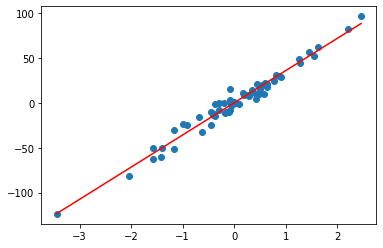

Шум: 10.0
Score: 0.9333262878145678
Коэффициенты генерации: [ 0.         35.81900115]
Коэфициенты регрессии: [-1.47421377 35.92949809]
Уравнение исходной зависимости: 0.0 * x_1 + 35.82 * x_2
Уравнение регресии: -1.47 * x_1 + 35.93 * x_2 + 1.53


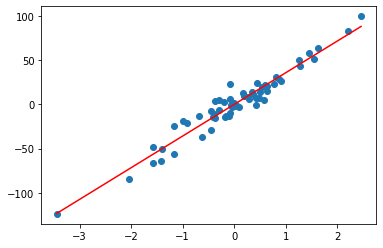

Шум: 15.0
Score: 0.8615142283911436
Коэффициенты генерации: [ 0.         35.81900115]
Коэфициенты регрессии: [-2.21132066 35.98474656]
Уравнение исходной зависимости: 0.0 * x_1 + 35.82 * x_2
Уравнение регресии: -2.21 * x_1 + 35.98 * x_2 + 2.3


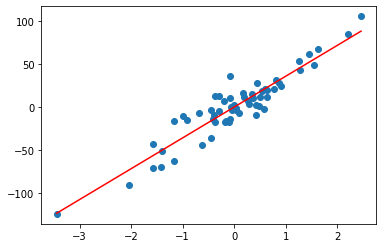

In [1963]:
class LinearModel:
    def __init__(self, data: DataSequence):
        self.data = data
        self.reg = LinearRegression().fit(data.X_train, data.y_train)

    def show_test_plot(self):
        x_column = self.data.X_test[:, 1]
        coef_x = np.linspace(np.min(x_column), np.max(x_column), 200)
        coef_y = coef_x * np.max(self.data.coef)
        plt.scatter(x_column, self.data.y_test)
        plt.plot(coef_x, coef_y, color='r')
        plt.show()

    def __str__(self):
        data = self.data
        noise, X_test, y_test, reg = data.noise, data.X_test, data.y_test, self.reg
        return f'Шум: {noise}\n' \
               f'Score: {reg.score(X_test, y_test)}\n' \
               f'Коэффициенты генерации: {data.coef}\n' \
               f'Коэфициенты регрессии: {reg.coef_}\n' \
               f'Уравнение исходной зависимости: {self.__make_generation_equation()}\n' \
               f'Уравнение регресии: {self.__make_regression_equation()}'

    def __make_generation_equation(self):
        coefs = self.data.coef
        str_coefs = [f'{round(el, 2)} * x_{i + 1}' for i, el in enumerate(coefs)]
        return ' + '.join(str_coefs)

    def __make_regression_equation(self):
        coefs = self.reg.coef_
        free_var = self.reg.intercept_
        str_coefs = [f'{round(el, 2)} * x_{i + 1}' for i, el in enumerate(coefs)]
        return ' + '.join(str_coefs) + f' + {round(free_var, 2)}'

models = [LinearModel(data=data) for data in result_data]

for model in models:
    print(model)
    model.show_test_plot()

## Задание 2

### Часть 1

Имеются данные о росте и весе 25 тыс. подростков в дюймах и фунтах
соответственно (источник). Данные содержатся в файле HeightsWeights.csv (выдается преподавателем), либо можно скачать
данные из источника. Импортировать эти данные в DataFrame и вывести несколько первых записей
(для контроля корректности импорта и получения представления о наборе данных).

In [1964]:
warnings.filterwarnings('ignore')
df = pd.read_csv('../data/HeightsWeights.csv', index_col='Index')
df

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


Выполнить первичный анализ данных: построить гистограммы распределения признаков (с заголовками) и проанализировать
характер их распределения, наличие/отсутствие выбросов.

In [1965]:
class Constants:
    """
    Положительная асимметрия означает,
    что хвост в правой части распределения длиннее или толще.

    Отрицательная асимметрия означает,
    что хвост с левой стороны распределения длиннее или толще.
    """
    class Skew:
        negative = 'негативное'
        positive = 'положительное'
        symmetrical = 'данные достаточно симметричны'
        medium = 'умеренное'
        # данные сильно искажены
        high = 'высокое'

    """
    Mesokurtic - экстремальные значения распределения подобны
    значениям характеристики нормального распределения

    Platykurtic - данные имеют легкие хвосты или не содержат выбросов

    Leptokurtic - данные имеют тяжелые хвосты или обилие выбросов
    """
    class Kurtosis:
        leptokurtic = 'leptokurtic'
        platykurtic = 'platykurtic'
        mesokurtic = 'mesokurtic'

def fetch_kurtosis_status(kurtosis):
    if kurtosis > 0:
        return Constants.Kurtosis.leptokurtic
    elif kurtosis < 0:
        return Constants.Kurtosis.platykurtic
    else:
        return Constants.Kurtosis.mesokurtic

def fetch_skew_status(skew):
    mark = Constants.Skew.negative if skew < 0 else Constants.Skew.positive
    if -0.5 <= skew < 0.5:
        return Constants.Skew.symmetrical
    elif 0.5 <= abs(skew) <= 1:
        return f'{Constants.Skew.medium} {mark}'
    else:
        return f'{Constants.Skew.high} {mark}'

def present_info(feature):
    skew = feature.skew()
    kurtosis = feature.kurtosis()

    print(f'Смещение ({fetch_skew_status(skew=skew)}): {skew}')
    print(f'Эксцесс ({fetch_kurtosis_status(kurtosis=kurtosis)}): {kurtosis}')
    plt.figure()
    plt.title(feature.name)
    sns.distplot(feature.to_list(), kde=False, fit=sts.norm, fit_kws={"color":"red"})
    sns.distplot(feature.to_list(), kde=False, fit=sts.lognorm, fit_kws={"color":"blue"})

Смещение (данные достаточно симметричны): -0.00565797936693913
Эксцесс (platykurtic): -0.03515940944584184


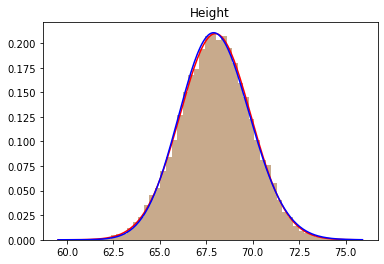

In [1966]:
"""
    Mesokurtic - экстремальные значения распределения подобны
    значениям характеристики нормального распределения

    Platykurtic - данные имеют легкие хвосты или не содержат выбросов

    Leptokurtic - данные имеют тяжелые хвосты или обилие выбросов
"""
present_info(df.Height)

Смещение (данные достаточно симметричны): -0.02603134379577526
Эксцесс (leptokurtic): 0.04474061069311519


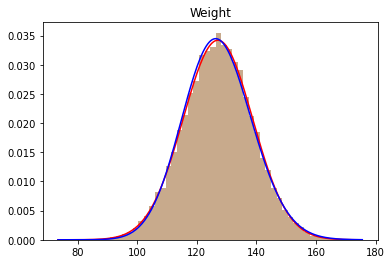

In [1967]:
present_info(df.Weight)

Добавить в DataFrame новый признак – индекс массы тела (BMI). Формулу для его вычисления можно, получить, например,
здесь (не забыть перевести фунты в килограммы, а дюймы в метры!). Указание: удобно использовать метод apply
в сочетании с лямбда-функцией Python. Вывести несколько первых записей и убедиться, что значения нового признака
вычислены корректно.

In [1968]:
def convert(h, w):
    return w * 0.45 / (h * h * 0.0254 * 0.0254)

lambda_bmi = lambda x: convert(x['Height'], x['Weight'])
df['BMI'] = df.apply(lambda_bmi, axis=1)
df

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.212235
2,71.51521,136.4873,18.614033
3,69.39874,153.0269,22.162038
4,68.21660,142.3354,21.334274
5,67.78781,144.2971,21.902792
...,...,...,...
24996,69.50215,118.0312,17.042976
24997,64.54826,120.1932,20.121294
24998,64.69855,118.2655,19.706707


Визуализировать попарные зависимости признаков (m×m графиков, где m – число признаков: по диагонали – гистограммы
распределения признаков, вне диагонали – scatter-графики зависимостей двух признаков).
Указание: использовать метод scatter_matrix из модуля plotting библиотеки Pandas. Проанализировать полученные графики:
выяснить, есть ли пары признаков, для которых можно предполагать линейную зависимость

array([[<AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='BMI', ylabel='Height'>],
       [<AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='BMI', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Height', ylabel='BMI'>,
        <AxesSubplot:xlabel='Weight', ylabel='BMI'>,
        <AxesSubplot:xlabel='BMI', ylabel='BMI'>]], dtype=object)

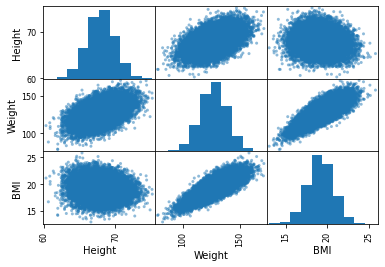

In [1969]:
pd.plotting.scatter_matrix(df)

Написать функцию, которая по двум параметрам w0 и w1 вычисляет квадратичную ошибку приближения зависимости роста y от
веса x линейной функцией y = w0+ w1∙x.

In [1970]:
class MSE:
    @staticmethod
    def calculate(X, y, w0, w1):
        return np.sum(np.square(y - (w0 + w1 * X))) / y.size

In [1971]:
class GradientDescent:

    mse = []

    def __init__(self, X, y, lr, steps, batch):
        self.X = X
        self.y = y
        self.lr = lr
        self.steps = steps
        self.batch = batch


    def start(self, use_stochastic=False):
        # начальные значения параметров
        w_0 = 50
        w_1 = 0.5
        mse = [] # список, куда сохраняем ошибку на каждом шаге
        y = self.y
        X = self.X

        for _ in range(self.steps):
            if use_stochastic:
                indexes = np.random.randint(0, len(X), 1)
                Xs = np.take(X, indexes)
                print(Xs)
                ys = np.take(y, indexes)
                f = ys - (w_1 * Xs + w_0)
                # print(f)
                # сдвигаемся по w0 на шаг в сторону уменьшения градиента ошибки
                w_0 -= self.lr * (-2 * f.sum() / ys.size)
                # сдвигаемся по w1 на шаг в сторону уменьшения градиента ошибки
                # w_1 -= self.lr * (-2 * Xs.dot(f).sum() / ys.size)
                w_1 -= self.lr * (-2 * Xs[0] * f[0] / ys.size)
            else:
                f = y - (w_1 * X + w_0)
                # сдвигаемся по w0 на шаг в сторону уменьшения градиента ошибки
                w_0 -= self.lr * (-2 * f.sum() / y.size)
                # сдвигаемся по w1 на шаг в сторону уменьшения градиента ошибки
                w_1 -= self.lr * (-2 * X.dot(f).sum() / y.size)

            mse.append(MSE.calculate(X, y, w_0, w_1))

        return w_0, w_1, mse

    def show_coef_plot(self, w_0, w_1):
        # plt.figure(figsize=(15, 7))
        plt.scatter(self.X, self.y)
        y_coef = (w_0 + w_1 * self.X)
        # print(len(self.X))
        # print(len(y_coef))
        plt.plot(self.X, y_coef, color="r")
        plt.show()

    def show_mse_plot(self, mse):
        # plt.figure(figsize=(20, 10))
        plt.plot(mse[10:])
        plt.show()

In [1972]:
gradient_descent = GradientDescent(
    X=np.array(df['Weight'].values),
    y=np.array(df['Height'].values),
    lr=0.00001,
    steps=100,
    batch=10
)

X = np.array(df['Weight'].values)
y = np.array(df['Height'].values)

   * Применить градиентный спуск к имеющемуся набору данных; вывести уравнение полученной линейной зависимости с оптимальными значениями коэффициентов.
   * Вывести на одном графике исходный набор данных в координатах вес – рост (использовать pylab.scatter) и прямую с оптимальными значениями коэффициентов.
   * Вывести график, показывающий изменение значения ошибки алгоритма в зависимости от числа итераций.

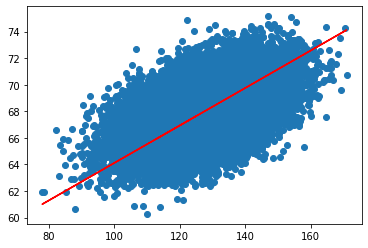

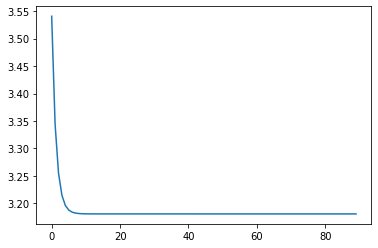

[956.9313552470269,
 436.8032153362588,
 200.32711880496427,
 92.8133352495922,
 43.93222703105964,
 21.708446351286966,
 11.604411315497273,
 7.010614853370619,
 4.922046638650117,
 3.9724796645654936,
 3.5407592489784188,
 3.344477609558134,
 3.255238136226104,
 3.2146653502911904,
 3.1962188585893148,
 3.187832079653439,
 3.1840189459863537,
 3.1822852187130146,
 3.1814968929075023,
 3.1811383935842446,
 3.180975314736996,
 3.1809010837481893,
 3.1808672474105184,
 3.180851776488405,
 3.180844655396771,
 3.1808413305529872,
 3.1808397316721324,
 3.180838917499814,
 3.180838460095014,
 3.180838164894487,
 3.1808379434401086,
 3.1808377555144243,
 3.1808375828325777,
 3.180837417081368,
 3.1808372544811987,
 3.1808370933136794,
 3.1808369327975408,
 3.1808367725775835,
 3.1808366124923113,
 3.180836452468306,
 3.180836292472183,
 3.1808361324887664,
 3.180835972511156,
 3.180835812536213,
 3.180835652562514,
 3.1808354925894085,
 3.1808353326166015,
 3.1808351726439605,
 3.18083501267

In [1973]:
w_0, w_1, mse = gradient_descent.start()
gradient_descent.show_coef_plot(w_0, w_1)
gradient_descent.show_mse_plot(mse)
# w_0, w_1
mse

### Часть 2

   * Применить стохастический градиентный спуск к имеющемуся набору данных; вывести уравнение полученной линейной зависимости с оптимальными
значениями коэффициентов.
   * Вывести на одном графике исходный набор данных в координатах вес – рост
(использовать pylab.scatter) и прямую с оптимальными значениями
коэффициентов, полученных с помощью стохастического градиентного спуска.
   * Вывести график, показывающий изменение значения ошибки алгоритма в зависимости от числа итераций. Сопоставить этот график с графиком,
полученным в п. 9.

[123.1376]
[112.3732]
[130.6884]
[113.8094]
[108.4966]
[108.6044]
[122.4926]
[126.8492]
[126.2769]
[126.914]
[135.5201]
[113.8999]
[106.3253]
[117.7477]
[145.0339]
[129.318]
[104.5094]
[136.7665]
[128.7716]
[123.7398]
[126.9799]
[118.3357]
[130.2555]
[118.7857]
[113.6105]
[128.2374]
[121.0602]
[130.75]
[135.9253]
[155.7611]
[118.4584]
[128.3129]
[135.9715]
[131.5506]
[96.06788]
[141.4994]
[132.6737]
[90.28757]
[130.9999]
[121.5063]
[155.3977]
[142.398]
[135.8907]
[117.7142]
[144.2723]
[129.099]
[130.8949]
[103.9181]
[97.61996]
[138.8158]
[126.795]
[144.1915]
[131.8001]
[107.4139]
[128.6178]
[127.0178]
[147.7557]
[142.3535]
[135.3841]
[119.1475]
[129.8861]
[122.478]
[109.628]
[139.7899]
[104.7024]
[108.9156]
[98.87507]
[140.9219]
[133.072]
[131.2464]
[125.4738]
[139.5953]
[118.2087]
[120.8518]
[123.3415]
[129.9892]
[111.5318]
[137.5925]
[130.3778]
[129.0132]
[133.3322]
[120.4853]
[140.4767]
[128.9968]
[124.2873]
[116.5828]
[135.9285]
[115.1205]
[128.9426]
[112.7226]
[117.2445]
[133.5177

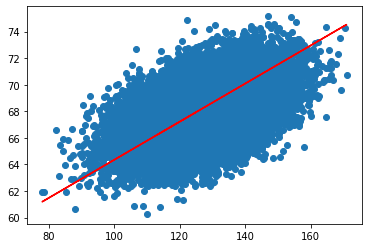

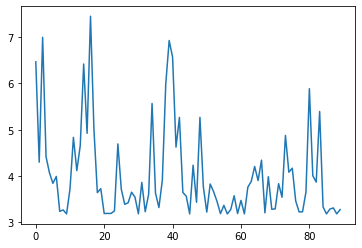

[1001.4594628956819,
 594.3251315510201,
 247.70724691420645,
 135.61750971582703,
 86.83182859007768,
 49.48425019359773,
 26.675272018474306,
 15.231049265334592,
 11.77870949312212,
 10.630734171200032,
 6.4647036749846745,
 4.298476430194433,
 6.994591341548273,
 4.4136199286068,
 4.067423968777959,
 3.8421321534318973,
 3.990153622910154,
 3.236018296250589,
 3.266735676495429,
 3.1813349131870905,
 3.7196421497960546,
 4.833351434100253,
 4.115922029448927,
 4.656443647131961,
 6.418688149208525,
 4.921681680465546,
 7.449947595581128,
 5.009473427259025,
 3.6406407728058627,
 3.7271463082514993,
 3.1900340197882913,
 3.191741601980117,
 3.1912828796683175,
 3.2453972974575747,
 4.692576699679459,
 3.7146620939212642,
 3.3887089720283083,
 3.4213537241372216,
 3.6489949334898166,
 3.5435937088086438,
 3.18334334599971,
 3.8609172663237836,
 3.2276416134394705,
 3.605759272572083,
 5.56597837907666,
 3.6319335310761596,
 3.318927068380517,
 3.9078916426906707,
 5.981885732747763,


In [1974]:
w_0_stochastic, w_1_stochastic, mse_stochastic = gradient_descent.start(use_stochastic=True)
gradient_descent.show_coef_plot(w_0_stochastic, w_1_stochastic)
gradient_descent.show_mse_plot(mse_stochastic)
# w_0_stochastic, w_1_stochastic
mse_stochastic

Сравнить результаты работы алгоритмов Full GD и SGD по достигнутому
значению функции ошибки, числу итераций и затраченному времени (для вывода затраченного времени использовать
в коде команду %%time – перед вызовом метода).

In [1975]:
gradient_descent = GradientDescent(
    X=np.array(df['Weight'].values),
    y=np.array(df['Height'].values),
    lr=0.00001,
    steps=2000,
    batch=1
)

In [1976]:
%%time
_ = gradient_descent.start()

CPU times: user 291 ms, sys: 694 ms, total: 985 ms
Wall time: 197 ms


In [1977]:
%%time
_ = gradient_descent.start(use_stochastic=True)


[137.0912]
[156.4888]
[155.8987]
[135.6227]
[144.9726]
[139.064]
[128.3211]
[106.4894]
[117.198]
[129.4436]
[133.2127]
[137.409]
[125.143]
[121.1719]
[144.8283]
[126.3823]
[119.9884]
[129.9501]
[124.6651]
[144.5009]
[116.698]
[130.5315]
[121.369]
[121.0826]
[103.9121]
[117.5058]
[107.2961]
[145.462]
[125.9014]
[135.5553]
[117.4489]
[140.395]
[145.3193]
[115.7365]
[116.7159]
[131.6423]
[130.1736]
[127.0172]
[131.3101]
[132.8417]
[125.1506]
[113.787]
[118.3034]
[123.7487]
[136.4392]
[134.275]
[108.6568]
[141.5823]
[127.8957]
[137.5864]
[141.5947]
[148.4787]
[121.5587]
[134.4355]
[138.1189]
[144.2612]
[129.3228]
[125.2]
[122.3345]
[130.7049]
[142.4785]
[121.3348]
[132.5488]
[133.9088]
[122.5351]
[126.3358]
[110.7174]
[121.2997]
[125.3999]
[125.4514]
[105.9587]
[117.7477]
[144.3527]
[123.1259]
[111.3684]
[144.2045]
[132.2874]
[106.6478]
[120.773]
[136.9183]
[106.9982]
[129.8548]
[127.3897]
[140.8166]
[128.8723]
[123.9059]
[125.3287]
[123.0304]
[114.0317]
[127.1691]
[123.3667]
[127.0952]
[1

### Часть 3

Используя инструментарий библиотеки Scikit-learn, выполнить разовое
разбиение данных исходного набора (значения веса и роста) на обучающую и тестовую выборки в соотношении 70/30.
Значения веса рассматривать в качестве признака, значения роста – в качестве целевой переменной.

In [1978]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

На обучающей выборке обучить две модели линейной регрессии: используя метод градиентного спуска
и метод стохастического градиентного спуска.

In [1979]:
class LinearRegression:

    def __init__(self, gradient_descent, with_stochastic=False):
        self.gradient_descent = gradient_descent
        self.with_stochastic = with_stochastic

    def fit(self):
        self.w_0, self.w_1, self.mse = gradient_descent.start(self.with_stochastic)

    def predict(self, X):
        assert self.w_0, 'You must call "fit"'
        assert self.w_1, 'You must call "fit"'
        return self.w_0 + self.w_1 * X

    def show_scatter(self, X, y):
        # plt.figure(figsize=(20, 10))
        plt.plot(X, y)
        # plt.scatter(X, y)
        plt.show()

    def __str__(self):
        assert self.w_0, 'You must call "fit"'
        assert self.w_1, 'You must call "fit"'
        return f'Уравнение регрессии: {round(self.w_0, 2)} + {round(self.w_1, 2)} * x_1'

In [1980]:
gradient_descent = GradientDescent(
    X=X_train,
    y=y_train,
    lr=0.00001,
    steps=20,
    batch=10
)

regression = LinearRegression(gradient_descent)
regression.fit()
print(regression)
y_pred = regression.predict(X_test)

Уравнение регрессии: 50.0 + 0.14 * x_1


In [1981]:
regression_s = LinearRegression(gradient_descent, with_stochastic=True)
regression_s.fit()
print(regression_s)
y_pred_s = regression_s.predict(X_test)

[120.4145]
[128.3612]
[125.0725]
[120.1547]
[124.4251]
[128.4988]
[116.5934]
[138.4704]
[145.3659]
[147.2286]
[126.8823]
[113.3802]
[131.8082]
[134.9166]
[114.9373]
[117.2019]
[133.8068]
[144.7629]
[126.5898]
[120.8998]
Уравнение регрессии: 50.0 + 0.14 * x_1


Градиентный спуск


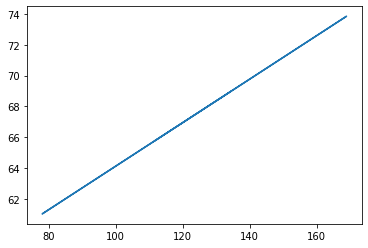

In [1982]:
print("Градиентный спуск")
regression.show_scatter(X_test, y_pred)

Стохастический градиентный спуск


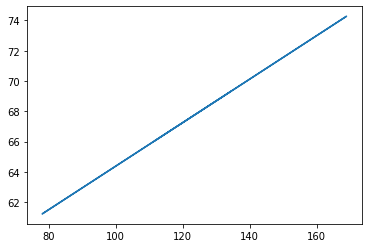

In [1983]:
print("Стохастический градиентный спуск")
regression_s.show_scatter(X_test, y_pred_s)

## Задание 3

Сгенерировать модельный набор данных для задачи линейной регрессии с
одной целевой переменной и четырьмя признаками, из которых информативными являются два. Параметр, определяющий степень
рассеянности данных, установить равным 5.0. Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.

In [1984]:
X, y, coef = make_regression(n_samples=200, n_features=4, noise=5.0, coef=True, n_informative=2, random_state=128)

Выполнить разбиение полученного набора данных на обучающую и тестовую выборки в соотношении 70/30.

In [1985]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Построить модели линейной регрессии, использующие L2- и L1- регуляризаторы. Обучить эти модели на обучающей выборке,
используя следующие значения коэффициента регуляризации: 0.001, 0.01, 0.2, 1, 2, 10.

In [1986]:
class LinearRegressionL:

    def __init__(self, model_type, coef):
        self.coef = coef
        self.model_type = model_type
        if model_type == "L1":
            self.model = Lasso(alpha=coef)
        elif model_type == "L2":
            self.model = Ridge(alpha=coef)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def __str__(self):
        return f'Коэф. регресии ({self.model_type}): {self.coef}\n' \
               f'Коэф. уравнения регрессии: {self.model.coef_}\n' \
               f'Свободный член: {self.model.intercept_}\n' \
               f'Уравнение регрессии: {self.__make_regression_equation()}\n'

    def __make_regression_equation(self):
        coefs = self.model.coef_
        free_var = self.model.intercept_
        str_coefs = [f'{round(el, 3)} * x_{i + 1}' for i, el in enumerate(coefs)]
        return ' + '.join(str_coefs) + f' + {round(free_var, 3)}'


models_l1 = []
models_l2 = []

for coef in [0.001, 0.01, 0.2, 1, 2, 10]:
    models_l1.append(LinearRegressionL(model_type="L1", coef=coef))
    models_l2.append(LinearRegressionL(model_type="L2", coef=coef))

* Для каждой обученной модели получить предсказания на объектах тестовой выборки.
* Вывести коэффициенты уравнений регрессии, полученные после обучения каждой модели. Записать соответствующие уравнения регрессии.

In [1987]:
for model in models_l1:
    model.fit(X_train, y_train)
    _ = model.predict(X_test)
    print(model)


Коэф. регресии (L1): 0.001
Коэф. уравнения регрессии: [-0.11771341 46.70893046  0.85968965 39.75661339]
Свободный член: 0.02287355204305186
Уравнение регрессии: -0.118 * x_1 + 46.709 * x_2 + 0.86 * x_3 + 39.757 * x_4 + 0.023

Коэф. регресии (L1): 0.01
Коэф. уравнения регрессии: [-0.10715495 46.69909691  0.8523127  39.74869801]
Свободный член: 0.025162399958920112
Уравнение регрессии: -0.107 * x_1 + 46.699 * x_2 + 0.852 * x_3 + 39.749 * x_4 + 0.025

Коэф. регресии (L1): 0.2
Коэф. уравнения регрессии: [-0.         46.50078342  0.69105491 39.57919765]
Свободный член: 0.0724564176876088
Уравнение регрессии: -0.0 * x_1 + 46.501 * x_2 + 0.691 * x_3 + 39.579 * x_4 + 0.072

Коэф. регресии (L1): 1
Коэф. уравнения регрессии: [-0.         45.70071114  0.         38.85571604]
Свободный член: 0.26659941658839337
Уравнение регрессии: -0.0 * x_1 + 45.701 * x_2 + 0.0 * x_3 + 38.856 * x_4 + 0.267

Коэф. регресии (L1): 2
Коэф. уравнения регрессии: [-0.         44.58866002  0.         37.91026902]
Свобод

In [1988]:
for model in models_l2:
    model.fit(X_train, y_train)
    _ = model.predict(X_test)
    print(model)

Коэф. регресии (L2): 0.001
Коэф. уравнения регрессии: [-0.11888054 46.70964586  0.86056408 39.75722351]
Свободный член: 0.02265980349460328
Уравнение регрессии: -0.119 * x_1 + 46.71 * x_2 + 0.861 * x_3 + 39.757 * x_4 + 0.023

Коэф. регресии (L2): 0.01
Коэф. уравнения регрессии: [-0.11865701 46.70621099  0.8610594  39.75480401]
Свободный член: 0.02302852220349294
Уравнение регрессии: -0.119 * x_1 + 46.706 * x_2 + 0.861 * x_3 + 39.755 * x_4 + 0.023

Коэф. регресии (L2): 0.2
Коэф. уравнения регрессии: [-0.11395428 46.63381829  0.87148182 39.70379445]
Свободный член: 0.030802967736830666
Уравнение регрессии: -0.114 * x_1 + 46.634 * x_2 + 0.871 * x_3 + 39.704 * x_4 + 0.031

Коэф. регресии (L2): 1
Коэф. уравнения регрессии: [-0.09449224 46.33152265  0.91465345 39.49044836]
Свободный член: 0.06333726253256877
Уравнение регрессии: -0.094 * x_1 + 46.332 * x_2 + 0.915 * x_3 + 39.49 * x_4 + 0.063

Коэф. регресии (L2): 2
Коэф. уравнения регрессии: [-0.07091505 45.95927422  0.96703747 39.22697477]


Выполнить анализ полученных уравнений: проследить, какое влияние на получаемые результаты оказывает тип регуляризатора,
значение коэффициента регуляризации.

**Lasso (L1 регуляризация)** регрессия при увеличении коэффициента снижает влияние малозначительных признаков на результат.



**Ridge (L2 регуляризация)** регрессия уменьшает дисперсию, но становится смещенным, т.к. минимизируется также и норма вектора параметров, что заставляет решение сдвигаться в сторону нуля.